In [15]:
!pip install pymysql

In [73]:
import pymysql
conn=pymysql.connect(host="localhost",
                     user="root",
                     password="Lakshmi8639@",
                     database="demo10")
conn

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
import pandas as pd 
query="select * from crime_data"
df=pd.read_sql(query,conn)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [23]:
df.Vict_Age.value_counts()

Vict_Age
0     90
26    19
35    17
28    16
23    15
      ..
8      1
9      1
17     1
70     1
78     1
Name: count, Length: 66, dtype: int64

In [26]:
!pip install geopandas

In [60]:
import pandas as pd
import pymysql

sql_query = "SELECT * FROM crime_data"
crime_data = pd.read_sql(sql_query, conn)
total_records = len(crime_data)
basic_stats = crime_data.describe()
unique_area_names = crime_data['AREA_NAME'].unique()
unique_crime_codes = crime_data['Crm_Cd'].unique()
unique_status = crime_data['Status'].unique()

print("Total number of records:", total_records)
print("\nBasic statistics:")
print(basic_stats)
print("\nUnique area names:", unique_area_names)
print("\nUnique crime codes:", unique_crime_codes)
print("\nUnique status:", unique_status)

Total number of records: 499

Basic statistics:
              DR_NO      Crm_Cd    Vict_Age         LAT         LON
count  4.990000e+02  499.000000  499.000000  499.000000  499.000000
mean   1.999930e+08  504.178357   32.142285   34.047335 -118.261283
std    8.742243e+06  198.381863   20.202136    0.053840    0.041560
min    1.030447e+07  210.000000    0.000000   33.710000 -118.560000
25%    2.001044e+08  330.000000   23.000000   34.040000 -118.260000
50%    2.001048e+08  442.000000   31.000000   34.050000 -118.250000
75%    2.001064e+08  624.000000   46.500000   34.050000 -118.240000
max    2.220130e+08  956.000000   78.000000   34.280000 -118.190000

Unique area names: ['Southwest' 'Central' 'N Hollywood' 'Mission' 'Van Nuys' 'Wilshire'
 'Rampart' 'Harbor' 'Pacific' 'Hollenbeck' 'West LA' 'Northeast'
 'Foothill' 'Hollywood' 'West Valley' '77th Street' 'Olympic' 'Devonshire'
 'Southeast']

Unique crime codes: [624 745 740 442 946 341 330 930 648 354 230 761 350 310 480 623 440 510
 21

In [62]:
import pandas as pd
import pymysql

sql_query = "SELECT DISTINCT Crm_Cd, Crm_Cd_Desc FROM crime_data"
crime_codes = pd.read_sql(sql_query, conn)
print("Distinct Crime Codes and Descriptions:")
print(crime_codes)

Distinct Crime Codes and Descriptions:
    Crm_Cd                                        Crm_Cd_Desc
0      624                           BATTERY - SIMPLE ASSAULT
1      745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2      740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
3      442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4      946                          OTHER MISCELLANEOUS CRIME
5      341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
6      330                              BURGLARY FROM VEHICLE
7      930             CRIMINAL THREATS - NO WEAPON DISPLAYED
8      648                                              ARSON
9      354                                  THEFT OF IDENTITY
10     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
11     761                                    BRANDISH WEAPON
12     350                                      THEFT, PERSON
13     310                                           BURGLARY
14     480                     

In [63]:
import pandas as pd
import pymysql

sql_query = "SELECT Date_Rptd, DATE_OCC FROM crime_data"
temporal_data = pd.read_sql(sql_query, conn)

# Convert string dates to datetime objects
temporal_data['Date_Rptd'] = pd.to_datetime(temporal_data['Date_Rptd'], format='%m-%d-%Y')
temporal_data['DATE_OCC'] = pd.to_datetime(temporal_data['DATE_OCC'], format='%m-%d-%Y')

temporal_data['Reported_Year'] = temporal_data['Date_Rptd'].dt.year
temporal_data['Reported_Month'] = temporal_data['Date_Rptd'].dt.month
temporal_data['Occurred_Year'] = temporal_data['DATE_OCC'].dt.year
temporal_data['Occurred_Month'] = temporal_data['DATE_OCC'].dt.month

total_reports = len(temporal_data)
earliest_report_date = temporal_data['Date_Rptd'].min()
latest_report_date = temporal_data['Date_Rptd'].max()

print("Total number of reports:", total_reports)
print("Earliest report date:", earliest_report_date)
print("Latest report date:", latest_report_date)

# Monthly reports trends
monthly_report_counts = temporal_data.groupby('Reported_Month').size()
monthly_occurred_counts = temporal_data.groupby('Occurred_Month').size()

print("\nMonthly report counts:")
print(monthly_report_counts)
print("\nMonthly occurred counts:")
print(monthly_occurred_counts)


Total number of reports: 499
Earliest report date: 2020-01-01 00:00:00
Latest report date: 2022-08-06 00:00:00

Monthly report counts:
Reported_Month
1     310
2     135
3       5
4       6
5       5
6       5
7       3
8       4
9       4
10      4
11      7
12     11
dtype: int64

Monthly occurred counts:
Occurred_Month
1     314
2     130
3       4
4       5
5       5
6       6
7       3
8       3
9       5
10      4
11      8
12     12
dtype: int64


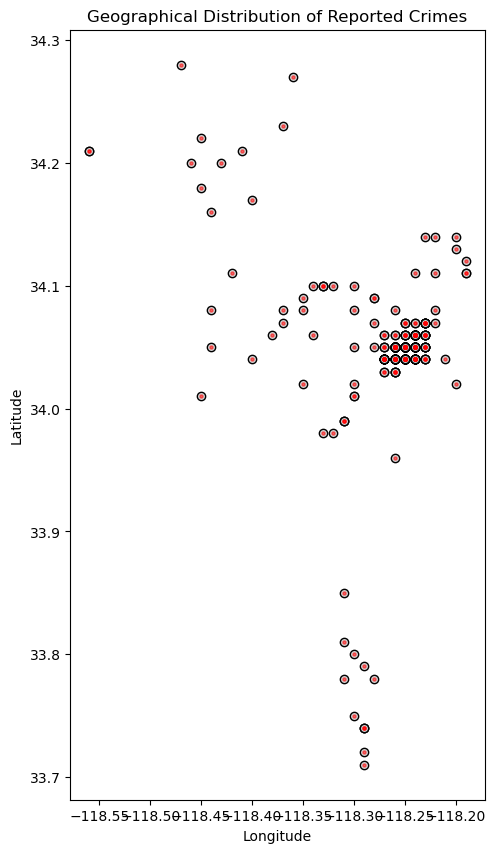

In [66]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pymysql

sql_query = "SELECT LAT, LON FROM crime_data"
geographical_data = pd.read_sql(sql_query, conn)
geometry = [Point(xy) for xy in zip(geographical_data['LON'], geographical_data['LAT'])]

# Create a GeoDataFrame
crimes_geo = gpd.GeoDataFrame(geographical_data, geometry=geometry, crs="EPSG:4326")
map_df = gpd.read_file(r'C:\Users\Chaitvik Reddy\Documents\Downloads\mygeodata\crime_data-point.shp')
fig, ax = plt.subplots(figsize=(10, 10))
map_df.plot(ax=ax, color='lightgrey', edgecolor='black')
crimes_geo.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Geographical Distribution of Reported Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [71]:
import folium
import pandas as pd
import pymysql

sql_query = "SELECT LAT, LON FROM crime_data"
crime_data = pd.read_sql(sql_query, conn)

crime_map = folium.Map(location=[crime_data['LAT'].mean(), crime_data['LON'].mean()], zoom_start=10)
for index, row in crime_data.iterrows():
    folium.Marker(location=[row['LAT'], row['LON']]).add_to(crime_map)

# Display the map
crime_map.save("crime_hotspots_map.html")
print("crime_map:",crime_map)

crime_map: <folium.folium.Map object at 0x000001FC58BAB190>


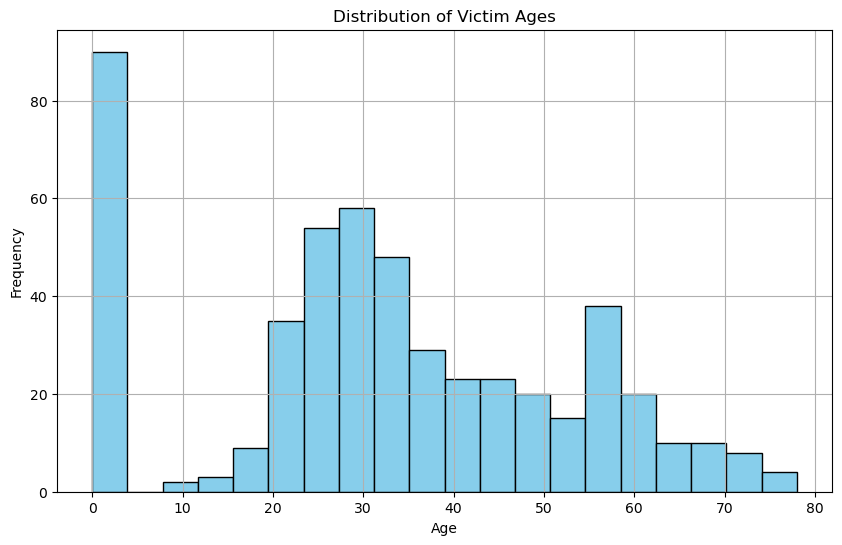

gender_counts: Vict_Sex
M    278
F    155
X     39
      27
Name: count, dtype: int64


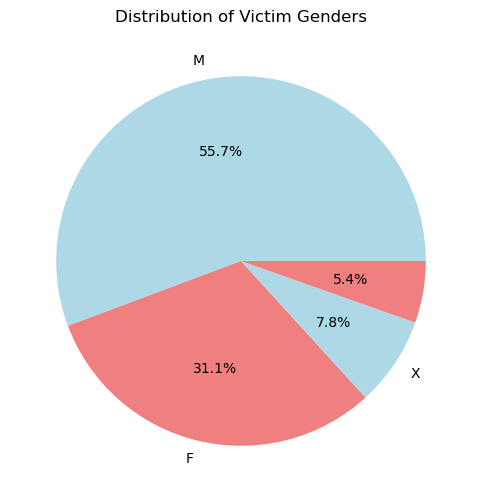

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

sql_query = "SELECT Vict_Age, Vict_Sex FROM crime_data"
victim_data = pd.read_sql(sql_query, conn)

#dropna using for Remove rows with missing values
victim_data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(victim_data['Vict_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

gender_counts = victim_data['Vict_Sex'].value_counts()
print("gender_counts:",gender_counts)
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Victim Genders')
plt.show()


In [80]:
import pandas as pd
import pymysql

sql_query = "SELECT Premis_Desc, COUNT(*) AS num_crimes FROM crime_data GROUP BY Premis_Desc ORDER BY num_crimes DESC"
premises_data = pd.read_sql(sql_query, conn)
print("Common Premises Descriptions where Crimes Occur:")
print(premises_data)


Common Premises Descriptions where Crimes Occur:
                                     Premis_Desc  num_crimes
0                                         STREET         105
1                                       SIDEWALK          62
2                                    PARKING LOT          46
3   MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)          45
4                         SINGLE FAMILY DWELLING          25
..                                           ...         ...
62                        OFFICE BUILDING/OFFICE           1
63            ABANDONED BUILDING ABANDONED HOUSE           1
64         PHARMACY INSIDE STORE OR SUPERMARKET*           1
65                   YARD (RESIDENTIAL/BUSINESS)           1
66                   MTA PROPERTY OR PARKING LOT           1

[67 rows x 2 columns]


In [81]:
import pandas as pd
import pymysql

sql_query = "SELECT Status, COUNT(*) AS num_crimes FROM crime_data GROUP BY Status ORDER BY num_crimes DESC"
status_data = pd.read_sql(sql_query, conn)
print("Status of Reported Crimes:")
print(status_data)


Status of Reported Crimes:
  Status  num_crimes
0     IC         447
1     AA          27
2     AO          24
3     JO           1


In [82]:
import pandas as pd
import pymysql

sql_query = "SELECT Crm_Cd_Desc, Status, COUNT(*) AS num_crimes FROM crime_data GROUP BY Crm_Cd_Desc, Status ORDER BY Crm_Cd_Desc, num_crimes DESC"
crime_status_data = pd.read_sql(sql_query, conn)

status_groups = crime_status_data.groupby('Status')
for status, group in status_groups:
    print("Status:", status)
    print(group)
    print("\n")


Status: AA
                                          Crm_Cd_Desc Status  num_crimes
2      ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     AA           6
5                                   ATTEMPTED ROBBERY     AA           1
8                            BATTERY - SIMPLE ASSAULT     AA           1
11                            BATTERY POLICE (SIMPLE)     AA           1
13                                      BIKE - STOLEN     AA           1
20                                           BURGLARY     AA           1
26             CRIMINAL THREATS - NO WEAPON DISPLAYED     AA           1
29                   DOCUMENT FORGERY / STOLEN FELONY     AA           1
31                                   FAILURE TO YIELD     AA           1
41                                            ROBBERY     AA           4
50  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...     AA           1
52                                      THEFT, PERSON     AA           1
55                                      

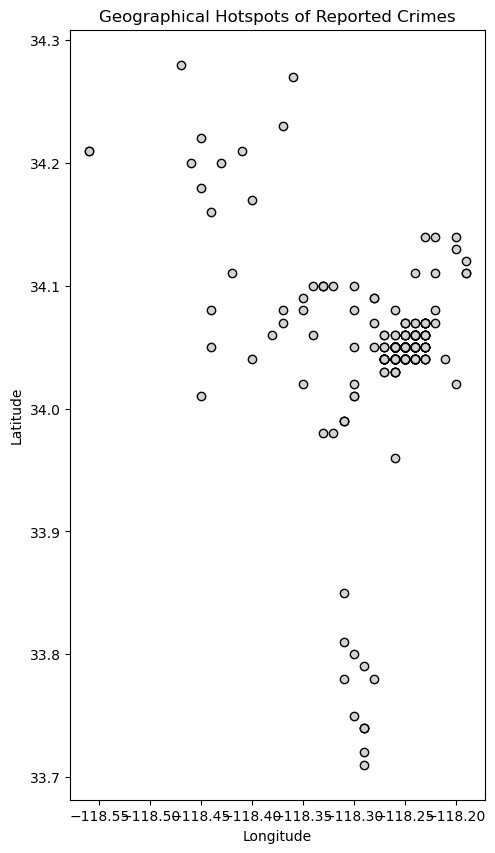

In [86]:
# Where are the geographical hotspots for reported crimes?

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

sql_query = "SELECT LAT, LON FROM crime_data"
crime_data = pd.read_sql(sql_query, conn)

# Convert latitude and longitude to GeoDataFrame
geometry = gpd.points_from_xy(crime_data['LON'], crime_data['LAT'])
crimes_geo = gpd.GeoDataFrame(crime_data, geometry=geometry, crs="EPSG:4326")
map_df = gpd.read_file(r'C:\Users\Chaitvik Reddy\Documents\Downloads\mygeodata\crime_data-point.shp')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_df.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.title('Geographical Hotspots of Reported Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

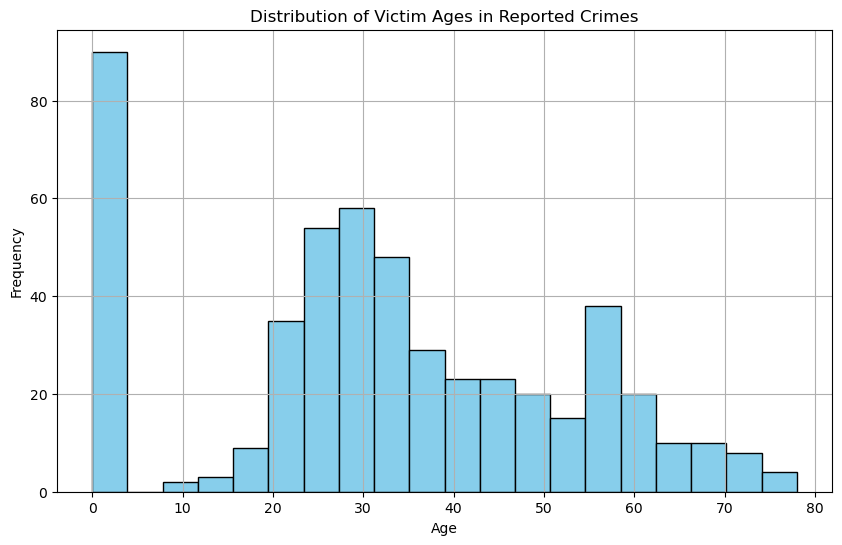

In [87]:
# What is the distribution of victim ages in reported crimes?

import pandas as pd
import matplotlib.pyplot as plt
import pymysql

sql_query = "SELECT Vict_Age FROM crime_data"
victim_age_data = pd.read_sql(sql_query, conn)

plt.figure(figsize=(10, 6))
plt.hist(victim_age_data['Vict_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [89]:
# Is there a significant difference in crime rates between male and female victims?

import pandas as pd
import pymysql
from scipy.stats import ttest_ind

sql_query = "SELECT Vict_Sex, COUNT(*) AS num_crimes FROM crime_data GROUP BY Vict_Sex"
crime_counts_data = pd.read_sql(sql_query, conn)
male_crime_counts = crime_counts_data[crime_counts_data['Vict_Sex'] == 'M']['num_crimes']
female_crime_counts = crime_counts_data[crime_counts_data['Vict_Sex'] == 'F']['num_crimes']

t_statistic, p_value = ttest_ind(male_crime_counts, female_crime_counts)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in crime rates between male and female victims.")
else:
    print("There is no significant difference in crime rates between male and female victims.")


T-Statistic: nan
P-Value: nan
There is no significant difference in crime rates between male and female victims.


In [91]:
# Where do most crimes occur based on the "Location" column?

import pandas as pd
import pymysql

sql_query = "SELECT Location, COUNT(*) AS num_crimes FROM crime_data GROUP BY Location ORDER BY num_crimes DESC LIMIT 1"
location_data = pd.read_sql(sql_query, conn)
print("Location with the most crimes:", location_data['Location'].iloc[0])
print("Number of crimes:", location_data['num_crimes'].iloc[0])


Location with the most crimes: 800 N ALAMEDA ST
Number of crimes: 14


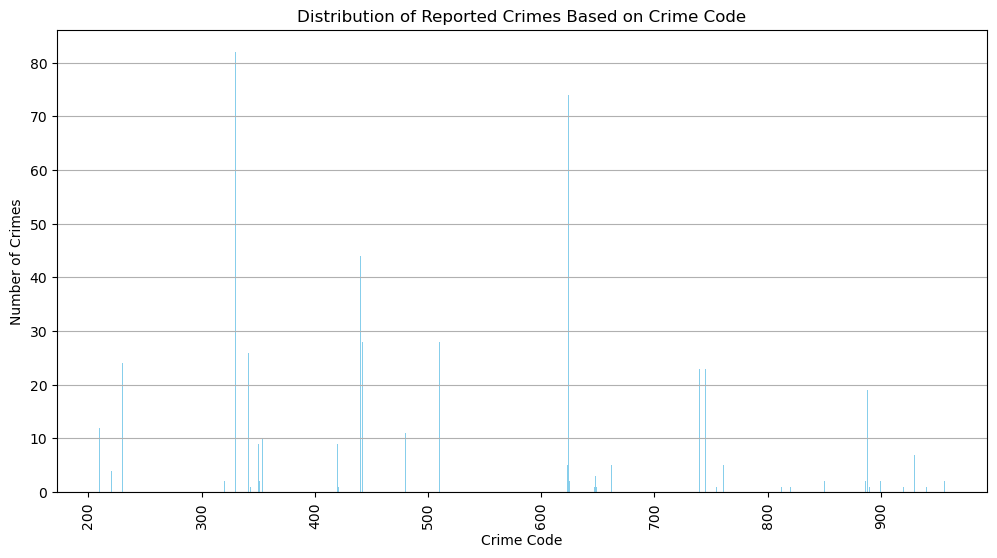

In [92]:
# What is the distribution of reported crimes based on Crime Code?

import pandas as pd
import matplotlib.pyplot as plt
import pymysql

sql_query = "SELECT Crm_Cd, COUNT(*) AS num_crimes FROM crime_data GROUP BY Crm_Cd ORDER BY num_crimes DESC"
crime_code_data = pd.read_sql(sql_query, conn)

plt.figure(figsize=(12, 6))
plt.bar(crime_code_data['Crm_Cd'], crime_code_data['num_crimes'], color='skyblue')
plt.title('Distribution of Reported Crimes Based on Crime Code')
plt.xlabel('Crime Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [70]:
pip install folium

Note: you may need to restart the kernel to use updated packages.
